<a href="https://colab.research.google.com/github/Sanjaykumar13055/SENTIMENT_ANALYSIS/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6.4
4.8


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


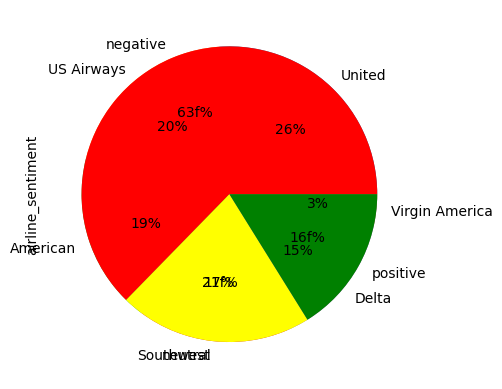

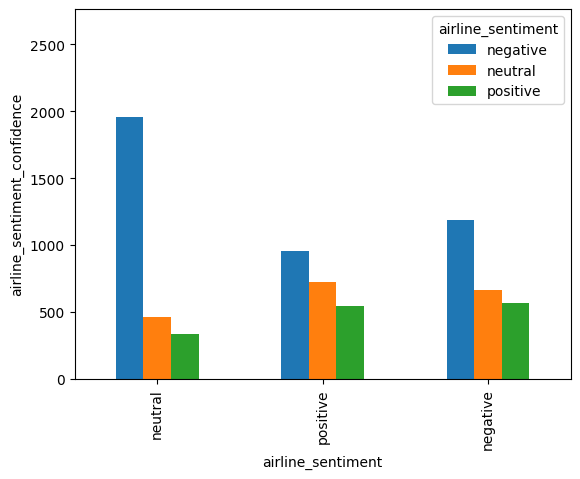

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
data_source_url="Tweets.csv"
airline_tweets=pd.read_csv(data_source_url)
airline_tweets.head()
plot_size=plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])
plt.rcParams["figure.figsize"]=plot_size
airline_tweets.airline.value_counts().plot(kind='pie',autopct='%1.0f%%')
airline_tweets.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0ff%%',colors=["red","yellow","green"])
airline_sentiment=airline_tweets.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
import seaborn as sns
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=airline_tweets)
features=airline_tweets.iloc[:,10].values
labels=airline_tweets.iloc[:,1].values
processed_features=[]
for sentence in range(0,len(features)):
  processed_feature=re.sub(r'\W',' ',str(features[sentence]))
  processed_feature=re.sub(r'\s+[a-zA-Z]\s+',' ',processed_feature)
  processed_feature=re.sub(r'\^[a-zA-Z]\s+',' ',processed_feature)
  processed_feature=re.sub(r'\s+',' ',processed_feature,flags=re.I)
  processed_feature=re.sub(r'^b\s+',' ',processed_feature)
  processed_feature=processed_feature.lower()
  processed_features.append(processed_feature)
!pip install nltk
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
vectorizer=TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
processed_features=vectorizer.fit_transform(processed_features).toarray()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(processed_features,labels,test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestClassifier
text_classifier=RandomForestClassifier(n_estimators=200,random_state=0)
text_classifier.fit(x_train,y_train)
predictions=text_classifier.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

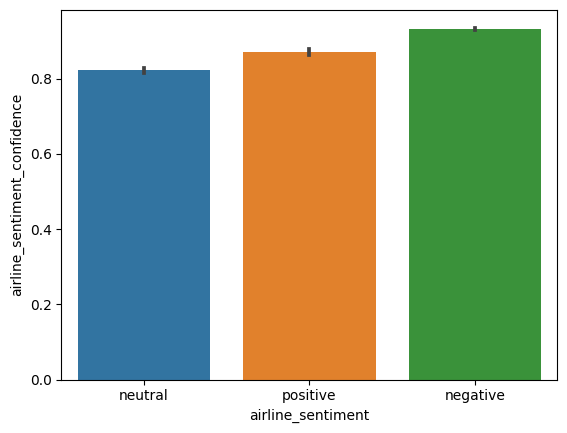

In [ ]:
import seaborn as sns
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=airline_tweets)
features=airline_tweets.iloc[:,10].values
labels=airline_tweets.iloc[:,1].values
processed_features=[]
for sentence in range(0,len(features)):
  processed_feature=re.sub(r'\W',' ',str(features[sentence]))
  processed_feature=re.sub(r'\s+[a-zA-Z]\s+',' ',processed_feature)
  processed_feature=re.sub(r'\^[a-zA-Z]\s+',' ',processed_feature)
  processed_feature=re.sub(r'\s+',' ',processed_feature,flags=re.I)
  processed_feature=re.sub(r'^b\s+',' ',processed_feature)
  processed_feature=processed_feature.lower()
  processed_features.append(processed_feature)

In [ ]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
vectorizer=TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
processed_features=vectorizer.fit_transform(processed_features).toarray()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(processed_features,labels,test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestClassifier
text_classifier=RandomForestClassifier(n_estimators=200,random_state=0)
text_classifier.fit(x_train,y_train)
predictions=text_classifier.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995
